# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 1. Read Data
---

In [2]:
train_path='/content/drive/MyDrive/0_ML_TimeSeries_Competition/train.csv'   #give according paths
test_path='/content/drive/MyDrive/0_ML_TimeSeries_Competition/test1.csv'    #give according paths
df=pd.read_csv(train_path)
tmp=dff=df=df.drop(columns='ID')
df_test=pd.read_csv(test_path)

In [3]:
def func(df):
      date_string=str(int(df['#YY']))+'-'+str(int(df['MM']))+'-'+str(int(df['DD']))+' '+str(int(df['hh']))+':'+str(int(df['mm']))
      date_object = datetime.strptime(date_string, '%Y-%m-%d %H:%M')
      return date_object

df['Date']=df.apply(lambda x:func(x) ,axis=1)   

In [4]:
df.head(3)

#YY  MM  DD  hh  mm  WDIR(degT)  WSPD(m/s)  GST(m/s)  DPD(sec)  APD(sec)  \
0  2017   4  24   1  50          23        3.0       3.6      4.17      3.33   
1  2017   4  24   2  50          30        2.9       3.3      5.26      4.21   
2  2017   4  24   3  50         360        2.2       2.5      5.88      4.79   

   MWD(degT)  PRES(hPa)  ATMP(degC)  WTMP(degC)  DEWP(degC)  WVHT(m)  \
0        349     1019.1         4.7         5.1         4.2     0.39   
1        358     1018.8         4.6         4.8         4.1     0.65   
2         11     1018.3         4.6         4.7         4.2     0.90   

                 Date  
0 2017-04-24 01:50:00  
1 2017-04-24 02:50:00  
2 2017-04-24 03:50:00

# 2. Time Series Feature Engineering

---



## 2.1. New Feature Formation 

In [5]:
# Columns
cols=['#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)',
       'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)',
       'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)', 'WVHT(m)']
only=['WDIR(degT)', 'WSPD(m/s)',
       'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)',
       'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)', 'WVHT(m)']    

# Only Timeseries DATA
df=tmp[['Date','WVHT(m)']]
df=df.set_index('Date')


#LAG Features
target_variable='WVHT(m)'
df['lag_1'] = df[target_variable].shift(1)
df['lag_2'] = df[target_variable].shift(2)
df['lag_3'] = df[target_variable].shift(3)
df['lag_4'] = df[target_variable].shift(4)
df['lag_5'] = df[target_variable].shift(5)
#df['lag_6'] = df[target_variable].shift(6)
#df['lag_7'] = df[target_variable].shift(7)
#df['lag_8'] = df[target_variable].shift(8)
#df['lag_9'] = df[target_variable].shift(9)
#df['lag_10'] = df[target_variable].shift(10)



#Rolling Window Stats
#df['rolling_mean_3'] = df[target_variable].shift(1).rolling(window=3).mean()
#df['rolling_median_3'] = df[target_variable].shift(1).rolling(window=3).median()
#df['rolling_std_3'] = df[target_variable].shift(1).rolling(window=3).std()

#df['rolling_mean_4'] = df[target_variable].shift(1).rolling(window=3).mean()
#df['rolling_median_4'] = df[target_variable].shift(1).rolling(window=3).median()
#df['rolling_std_4'] = df[target_variable].shift(1).rolling(window=3).std()


#df['rolling_mean_20'] = df[target_variable].shift(1).rolling(window=20).mean()
#df['rolling_median_20'] = df[target_variable].shift(1).rolling(window=20).median()
#df['rolling_std_20'] = df[target_variable].shift(1).rolling(window=20).std()

#df['rolling_mean_30'] = df[target_variable].shift(1).rolling(window=30).mean()
#df['rolling_median_30'] = df[target_variable].shift(1).rolling(window=30).median()
#df['rolling_std_30'] = df[target_variable].shift(1).rolling(window=30).std()


#Expanding Window stats
#df['expand_lag_1']=df['lag_1'].expanding().mean()
#df['expand_lag_2']=df['lag_2'].expanding().mean()
#df['expand_lag_3']=df['lag_3'].expanding().mean()


#DD,MM,HH Features
df=pd.concat([df,dff.set_index('Date')[cols[:-1]]],axis=1)
df=df.dropna()
df=df.reset_index().drop(columns='Date')

<Axes: >

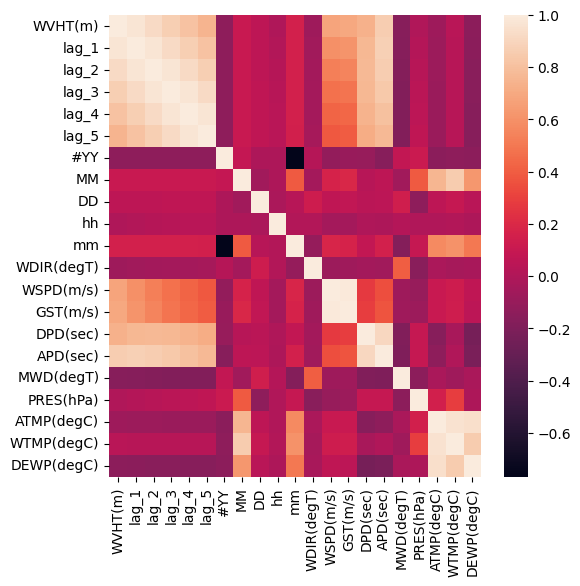

In [6]:
corr_=df.corr()
plt.figure(figsize = (6,6))
sns.heatmap(corr_)   

#Lag Features are Auto Correlated Features----Which helps to improve model performance

## 2.2 Train Data

In [55]:
all_features=list(df.columns)[1:]
some_features=['lag_1','lag_2','lag_3','lag_4','lag_5']+cols[:-1]


x=df[all_features].values                              # 1............all features with rolling--------24+ features
#x=df[some_features].values                            # 2..........all features without rolling --------20 features
#x=df[cols[:-1]].values                                # 3............only original data features-------15 features


y=df['WVHT(m)'].values
print(f'(x) Input Data shape: {x.shape}')   #2d data with 20 features
print(f'(y) Target Data shape: {y.shape}')  # 1d data with 1 feature ro predict using ML model

(x) Input Data shape: (3881, 20)
(y) Target Data shape: (3881,)


## 2.3. VIF Factor
* Multicollinearity ispresent but all features help to increase model performance, if I remove date features then rmse score increases.

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [10]:
vif = pd.DataFrame()
vif["variables"] = df.columns[1:]
vif["VIF"]=[variance_inflation_factor(df.iloc[:,1:].values, i) for i in range(df.iloc[:,1:].shape[1])]
vif=vif.sort_values(by = 'VIF', ascending = False)
vif

variables           VIF
5          #YY  57492.566918
16   PRES(hPa)  55902.787911
14    APD(sec)    432.016560
9           mm    318.662961
12    GST(m/s)    296.746110
11   WSPD(m/s)    291.187541
17  ATMP(degC)    236.703686
1        lag_2    173.786405
2        lag_3    173.604943
3        lag_4    172.231697
18  WTMP(degC)    167.862162
6           MM    131.345108
13    DPD(sec)    107.324953
0        lag_1    103.320456
4        lag_5     71.424930
19  DEWP(degC)     67.961988
7           DD      6.021609
8           hh      4.061928
10  WDIR(degT)      3.834188
15   MWD(degT)      3.360597

## 2.4. Feature selection----Using feature_importances_ method in Trees models like ExtraTrees, Random Forest, 
### Conclusion = Lag features and APD,GST, WSPD are very importatnt for best model performance

In [12]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from lightgbm import LGBMRegressor

In [13]:
def Impp(model,lst):
    imp=list(model.feature_importances_.round(4))
    tp=pd.DataFrame(np.array([lst[:],imp]).T,columns=['Columns','Imp'])
    tp=tp.sort_values(by = 'Imp', ascending = False)
    print(tp)

In [14]:
model=ExtraTreesRegressor()
model.fit(x,y)
Impp(model,df.columns[1:])    

       Columns     Imp
0        lag_1  0.4282
1        lag_2  0.2408
14    APD(sec)  0.1117
2        lag_3  0.0974
3        lag_4  0.0306
12    GST(m/s)  0.0283
11   WSPD(m/s)  0.0251
4        lag_5  0.0195
13    DPD(sec)   0.004
10  WDIR(degT)  0.0017
8           hh  0.0017
16   PRES(hPa)  0.0016
7           DD  0.0015
15   MWD(degT)  0.0015
19  DEWP(degC)  0.0013
6           MM  0.0011
17  ATMP(degC)  0.0011
18  WTMP(degC)  0.0011
5          #YY   0.001
9           mm  0.0006


In [15]:
model2=RandomForestRegressor()
model2.fit(x,y)
Impp(model2,df.columns[1:])   

       Columns     Imp
0        lag_1   0.936
14    APD(sec)  0.0186
12    GST(m/s)  0.0139
11   WSPD(m/s)  0.0112
10  WDIR(degT)   0.002
2        lag_3   0.002
1        lag_2  0.0019
4        lag_5  0.0019
3        lag_4  0.0018
16   PRES(hPa)  0.0017
8           hh  0.0014
15   MWD(degT)  0.0014
19  DEWP(degC)  0.0012
13    DPD(sec)  0.0011
7           DD   0.001
17  ATMP(degC)   0.001
18  WTMP(degC)   0.001
5          #YY  0.0003
6           MM  0.0003
9           mm  0.0001


In [16]:
model3=LGBMRegressor()
model3.fit(x,y)
Impp(model3,df.columns[1:])   

       Columns  Imp
14    APD(sec)  470
0        lag_1  387
12    GST(m/s)  264
11   WSPD(m/s)  262
10  WDIR(degT)  178
2        lag_3  159
3        lag_4  156
15   MWD(degT)  156
16   PRES(hPa)  136
1        lag_2  129
4        lag_5  114
13    DPD(sec)  107
17  ATMP(degC)  106
8           hh  100
19  DEWP(degC)   97
7           DD   74
18  WTMP(degC)   59
6           MM   20
5          #YY   16
9           mm   10


## 2.5. Feature Extraction --- Using PCA
### Didnt help to improve model performance so didnt use for final model training

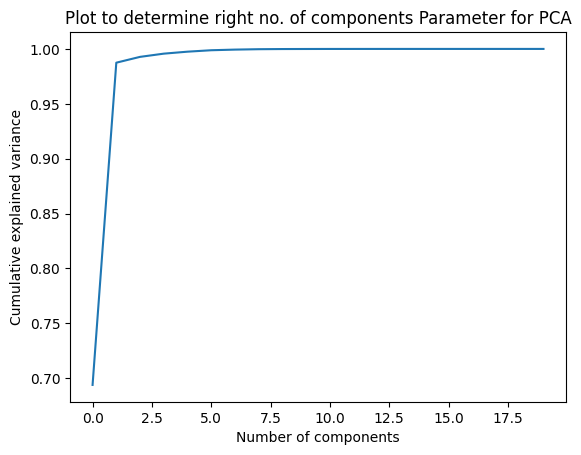

In [19]:
from sklearn.decomposition import PCA
pca = PCA().fit(x)


plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Plot to determine right no. of components Parameter for PCA')
plt.show()

In [24]:
pca = PCA(n_components=5)

# Fit the data to the PCA model and transform the data
x_pca = pca.fit_transform(x)
print(x_pca.shape)

(3881, 5)


#### But in Model training experiments it didnt perform good, so didnt use for final training

## 2.6. Transformations ---Also didnt improve model performance so didnt use in final model training

In [21]:
from scipy.special import boxcox, inv_boxcox

# Transformation on Prediction Variable = Y = WVHT(m)
y1= np.log(y)
y2= np.sqrt(y)
y3= boxcox(y,-1)

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Transformation on X data

# Standardization
scaler = StandardScaler()
x1 = scaler.fit_transform(x)
print("Standardized Data:",x1.shape)

# Normalization
normalizer = MinMaxScaler()
x2 = normalizer.fit_transform(x)
print("Normalized Data:",x2.shape)

Standardized Data: (3881, 20)
Normalized Data: (3881, 20)


# 3. EDA

---

In [ ]:
df.info()       #containes all NON-Null Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          3886 non-null   int64  
 1   #YY         3886 non-null   int64  
 2   MM          3886 non-null   int64  
 3   DD          3886 non-null   int64  
 4   hh          3886 non-null   int64  
 5   mm          3886 non-null   int64  
 6   WDIR(degT)  3886 non-null   int64  
 7   WSPD(m/s)   3886 non-null   float64
 8   GST(m/s)    3886 non-null   float64
 9   DPD(sec)    3886 non-null   float64
 10  APD(sec)    3886 non-null   float64
 11  MWD(degT)   3886 non-null   int64  
 12  PRES(hPa)   3886 non-null   float64
 13  ATMP(degC)  3886 non-null   float64
 14  WTMP(degC)  3886 non-null   float64
 15  DEWP(degC)  3886 non-null   float64
 16  WVHT(m)     3886 non-null   float64
dtypes: float64(9), int64(8)
memory usage: 516.2 KB


In [ ]:
df.describe()         #Stats

ID          #YY           MM           DD           hh  \
count  3.886000e+03  3886.000000  3886.000000  3886.000000  3886.000000   
mean   9.684491e+09  2017.855378     6.586207    16.546320    11.553011   
std    9.195449e+09     0.692806     1.412267     8.653715     6.715559   
min    2.017510e+08  2017.000000     4.000000     1.000000     0.000000   
25%    2.017781e+09  2017.000000     5.000000     9.000000     6.000000   
50%    2.019519e+09  2018.000000     6.000000    18.000000    12.000000   
75%    2.018626e+10  2018.000000     8.000000    24.000000    17.000000   
max    2.019628e+10  2019.000000     9.000000    31.000000    23.000000   

                mm   WDIR(degT)    WSPD(m/s)     GST(m/s)     DPD(sec)  \
count  3886.000000  3886.000000  3886.000000  3886.000000  3886.000000   
mean     48.215646   163.051981     5.737751     6.851595     4.205031   
std       3.826793   113.305082     2.385708     2.849304     1.031086   
min      40.000000     1.000000     0.000000     0.200000     2.150000   
25%      50.000000    53.000000     4.000000     4.800000     3.450000   
50%      50.000000   166.500000     5.600000     6.600000     4.000000   
75%      50.000000   257.000000     7.300000     8.675000     4.760000   
max      50.000000   360.000000    13.500000    16.800000    17.390000   

          APD(sec)    MWD(degT)    PRES(hPa)   ATMP(degC)   WTMP(degC)  \
count  3886.000000  3886.000000  3886.000000  3886.000000  3886.000000   
mean      3.528513   137.047607  1014.233479    15.294519    14.845239   
std       0.584589   109.104411     5.732770     6.410222     7.357890   
min       2.290000     0.000000   992.100000     3.400000     3.500000   
25%       3.080000    33.000000  1010.700000     9.000000     6.800000   
50%       3.440000   138.000000  1014.200000    17.100000    16.900000   
75%       3.890000   192.000000  1018.000000    20.900000    21.800000   
max       5.770000   360.000000  1030.600000    27.500000    25.300000   

        DEWP(degC)      WVHT(m)  
count  3886.000000  3886.000000  
mean     12.578410     0.641372  
std       6.064549     0.372959  
min      -4.000000     0.250000  
25%       7.525000     0.360000  
50%      13.500000     0.520000  
75%      17.800000     0.810000  
max      23.200000     2.630000

In [ ]:
def func(df):    #Form a Date Time Columns
      date_string=str(int(df['#YY']))+'-'+str(int(df['MM']))+'-'+str(int(df['DD']))+' '+str(int(df['hh']))+':'+str(int(df['mm']))
      date_object = datetime.strptime(date_string, '%Y-%m-%d %H:%M')
      return date_object

df['Date']=df.apply(lambda x:func(x) ,axis=1)      

Text(0, 0.5, 'Wave Height')

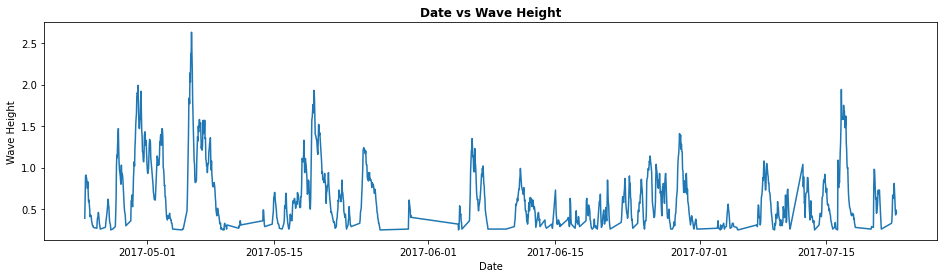

In [ ]:
plt.figure(figsize =(16, 4))
plt.plot(df['Date'].iloc[:1250], df['WVHT(m)'].iloc[:1250])    #split1-----2017 data
plt.title('Date vs Wave Height', fontweight="bold")
plt.xlabel('Date')
plt.ylabel('Wave Height')

Text(0, 0.5, 'Wave Height')

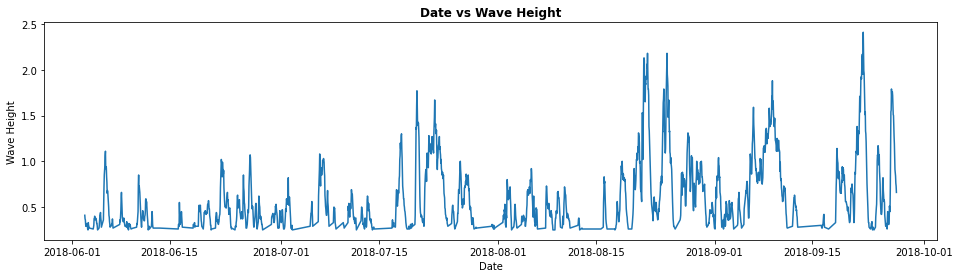

In [ ]:
plt.figure(figsize =(16, 4))
plt.plot(df['Date'].iloc[1300:3100], df['WVHT(m)'].iloc[1300:3100])     #split2---2018 data
plt.title('Date vs Wave Height', fontweight="bold")
plt.xlabel('Date')
plt.ylabel('Wave Height')

Text(0, 0.5, 'Wave Height')

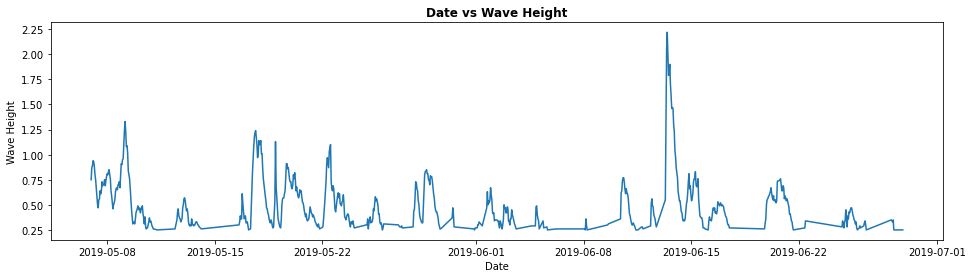

In [ ]:
plt.figure(figsize =(16, 4))
plt.plot(df['Date'].iloc[3200:], df['WVHT(m)'].iloc[3200:])            #split3----2019 data
plt.title('Date vs Wave Height', fontweight="bold")
plt.xlabel('Date')
plt.ylabel('Wave Height')

#### Contains Gaps in the data, so Arima like stats models didnt perform

Text(0, 0.5, 'Wave Height')

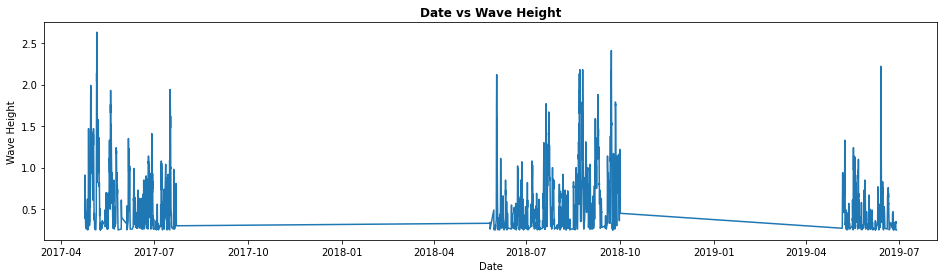

In [ ]:
plt.figure(figsize =(16, 4)) 
plt.plot(df['Date'], df['WVHT(m)'])                 
plt.title('Date vs Wave Height', fontweight="bold")
plt.xlabel('Date')
plt.ylabel('Wave Height')

#PLOT WHOLE DATA

In [ ]:
corr_=df.corr()

In [ ]:
corr_

ID       #YY        MM        DD        hh        mm  \
ID          1.000000  0.007537 -0.057642  0.429962  0.615945 -0.027720   
#YY         0.007537  1.000000  0.089301 -0.013093 -0.006706 -0.767845   
MM         -0.057642  0.089301  1.000000 -0.060247 -0.007213  0.384580   
DD          0.429962 -0.013093 -0.060247  1.000000 -0.019325  0.027773   
hh          0.615945 -0.006706 -0.007213 -0.019325  1.000000  0.007097   
mm         -0.027720 -0.767845  0.384580  0.027773  0.007097  1.000000   
WDIR(degT)  0.070105  0.022797 -0.046900  0.123331  0.009239 -0.107809   
WSPD(m/s)  -0.038268 -0.112935  0.168654  0.061848 -0.041710  0.180145   
GST(m/s)   -0.040253 -0.091289  0.189825  0.072226 -0.046681  0.166216   
DPD(sec)   -0.029757 -0.103989  0.023936  0.043274 -0.007235  0.080920   
APD(sec)   -0.037773 -0.165792  0.055748  0.050137 -0.011667  0.156808   
MWD(degT)   0.082592  0.076234 -0.061130  0.142248  0.014815 -0.176513   
PRES(hPa)  -0.101535  0.110130  0.387806 -0.133488 -0.002354  0.093902   
ATMP(degC)  0.025777 -0.149187  0.756070  0.055549  0.001455  0.565925   
WTMP(degC)  0.034826 -0.135193  0.851339  0.093276  0.010371  0.598926   
DEWP(degC)  0.038752 -0.141293  0.625120  0.035930 -0.009992  0.496559   
WVHT(m)    -0.027836 -0.135838  0.105168  0.056486 -0.005297  0.152288   

            WDIR(degT)  WSPD(m/s)  GST(m/s)  DPD(sec)  APD(sec)  MWD(degT)  \
ID            0.070105  -0.038268 -0.040253 -0.029757 -0.037773   0.082592   
#YY           0.022797  -0.112935 -0.091289 -0.103989 -0.165792   0.076234   
MM           -0.046900   0.168654  0.189825  0.023936  0.055748  -0.061130   
DD            0.123331   0.061848  0.072226  0.043274  0.050137   0.142248   
hh            0.009239  -0.041710 -0.046681 -0.007235 -0.011667   0.014815   
mm           -0.107809   0.180145  0.166216  0.080920  0.156808  -0.176513   
WDIR(degT)    1.000000  -0.080887 -0.070849 -0.052099 -0.055171   0.400040   
WSPD(m/s)    -0.080887   1.000000  0.986938  0.265773  0.342741  -0.074604   
GST(m/s)     -0.070849   0.986938  1.000000  0.282885  0.362590  -0.065117   
DPD(sec)     -0.052099   0.265773  0.282885  1.000000  0.908203  -0.191378   
APD(sec)     -0.055171   0.342741  0.362590  0.908203  1.000000  -0.200644   
MWD(degT)     0.400040  -0.074604 -0.065117 -0.191378 -0.200644   1.000000   
PRES(hPa)    -0.158441  -0.102649 -0.084490  0.090682  0.090726  -0.142733   
ATMP(degC)   -0.020251   0.110911  0.105744 -0.163948 -0.138025  -0.026456   
WTMP(degC)   -0.037577   0.129435  0.136223 -0.037411 -0.001819  -0.065393   
DEWP(degC)   -0.033285   0.066140  0.050991 -0.232985 -0.218562  -0.023773   
WVHT(m)      -0.072296   0.676804  0.691531  0.735568  0.854101  -0.164750   

            PRES(hPa)  ATMP(degC)  WTMP(degC)  DEWP(degC)   WVHT(m)  
ID          -0.101535    0.025777    0.034826    0.038752 -0.027836  
#YY          0.110130   -0.149187   -0.135193   -0.141293 -0.135838  
MM           0.387806    0.756070    0.851339    0.625120  0.105168  
DD          -0.133488    0.055549    0.093276    0.035930  0.056486  
hh          -0.002354    0.001455    0.010371   -0.009992 -0.005297  
mm           0.093902    0.565925    0.598926    0.496559  0.152288  
WDIR(degT)  -0.158441   -0.020251   -0.037577   -0.033285 -0.072296  
WSPD(m/s)   -0.102649    0.110911    0.129435    0.066140  0.676804  
GST(m/s)    -0.084490    0.105744    0.136223    0.050991  0.691531  
DPD(sec)     0.090682   -0.163948   -0.037411   -0.232985  0.735568  
APD(sec)     0.090726   -0.138025   -0.001819   -0.218562  0.854101  
MWD(degT)   -0.142733   -0.026456   -0.065393   -0.023773 -0.164750  
PRES(hPa)    1.000000    0.145336    0.286754   -0.015896 -0.000905  
ATMP(degC)   0.145336    1.000000    0.952580    0.939676 -0.071976  
WTMP(degC)   0.286754    0.952580    1.000000    0.850205  0.033039  
DEWP(degC)  -0.015896    0.939676    0.850205    1.000000 -0.141361  
WVHT(m)     -0.000905   -0.071976    0.033039   -0.141361  1.000000

<Axes: >

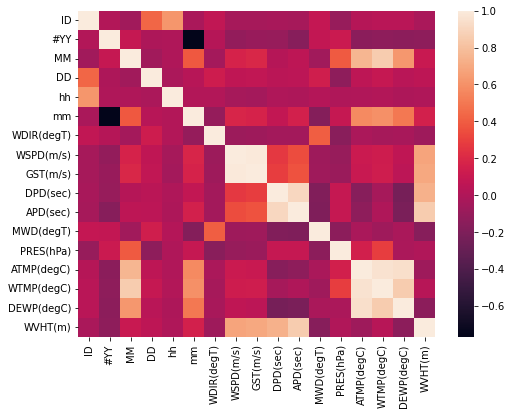

In [ ]:
plt.figure(figsize = (8,6))
sns.heatmap(corr_)            #Plotting HeatMap

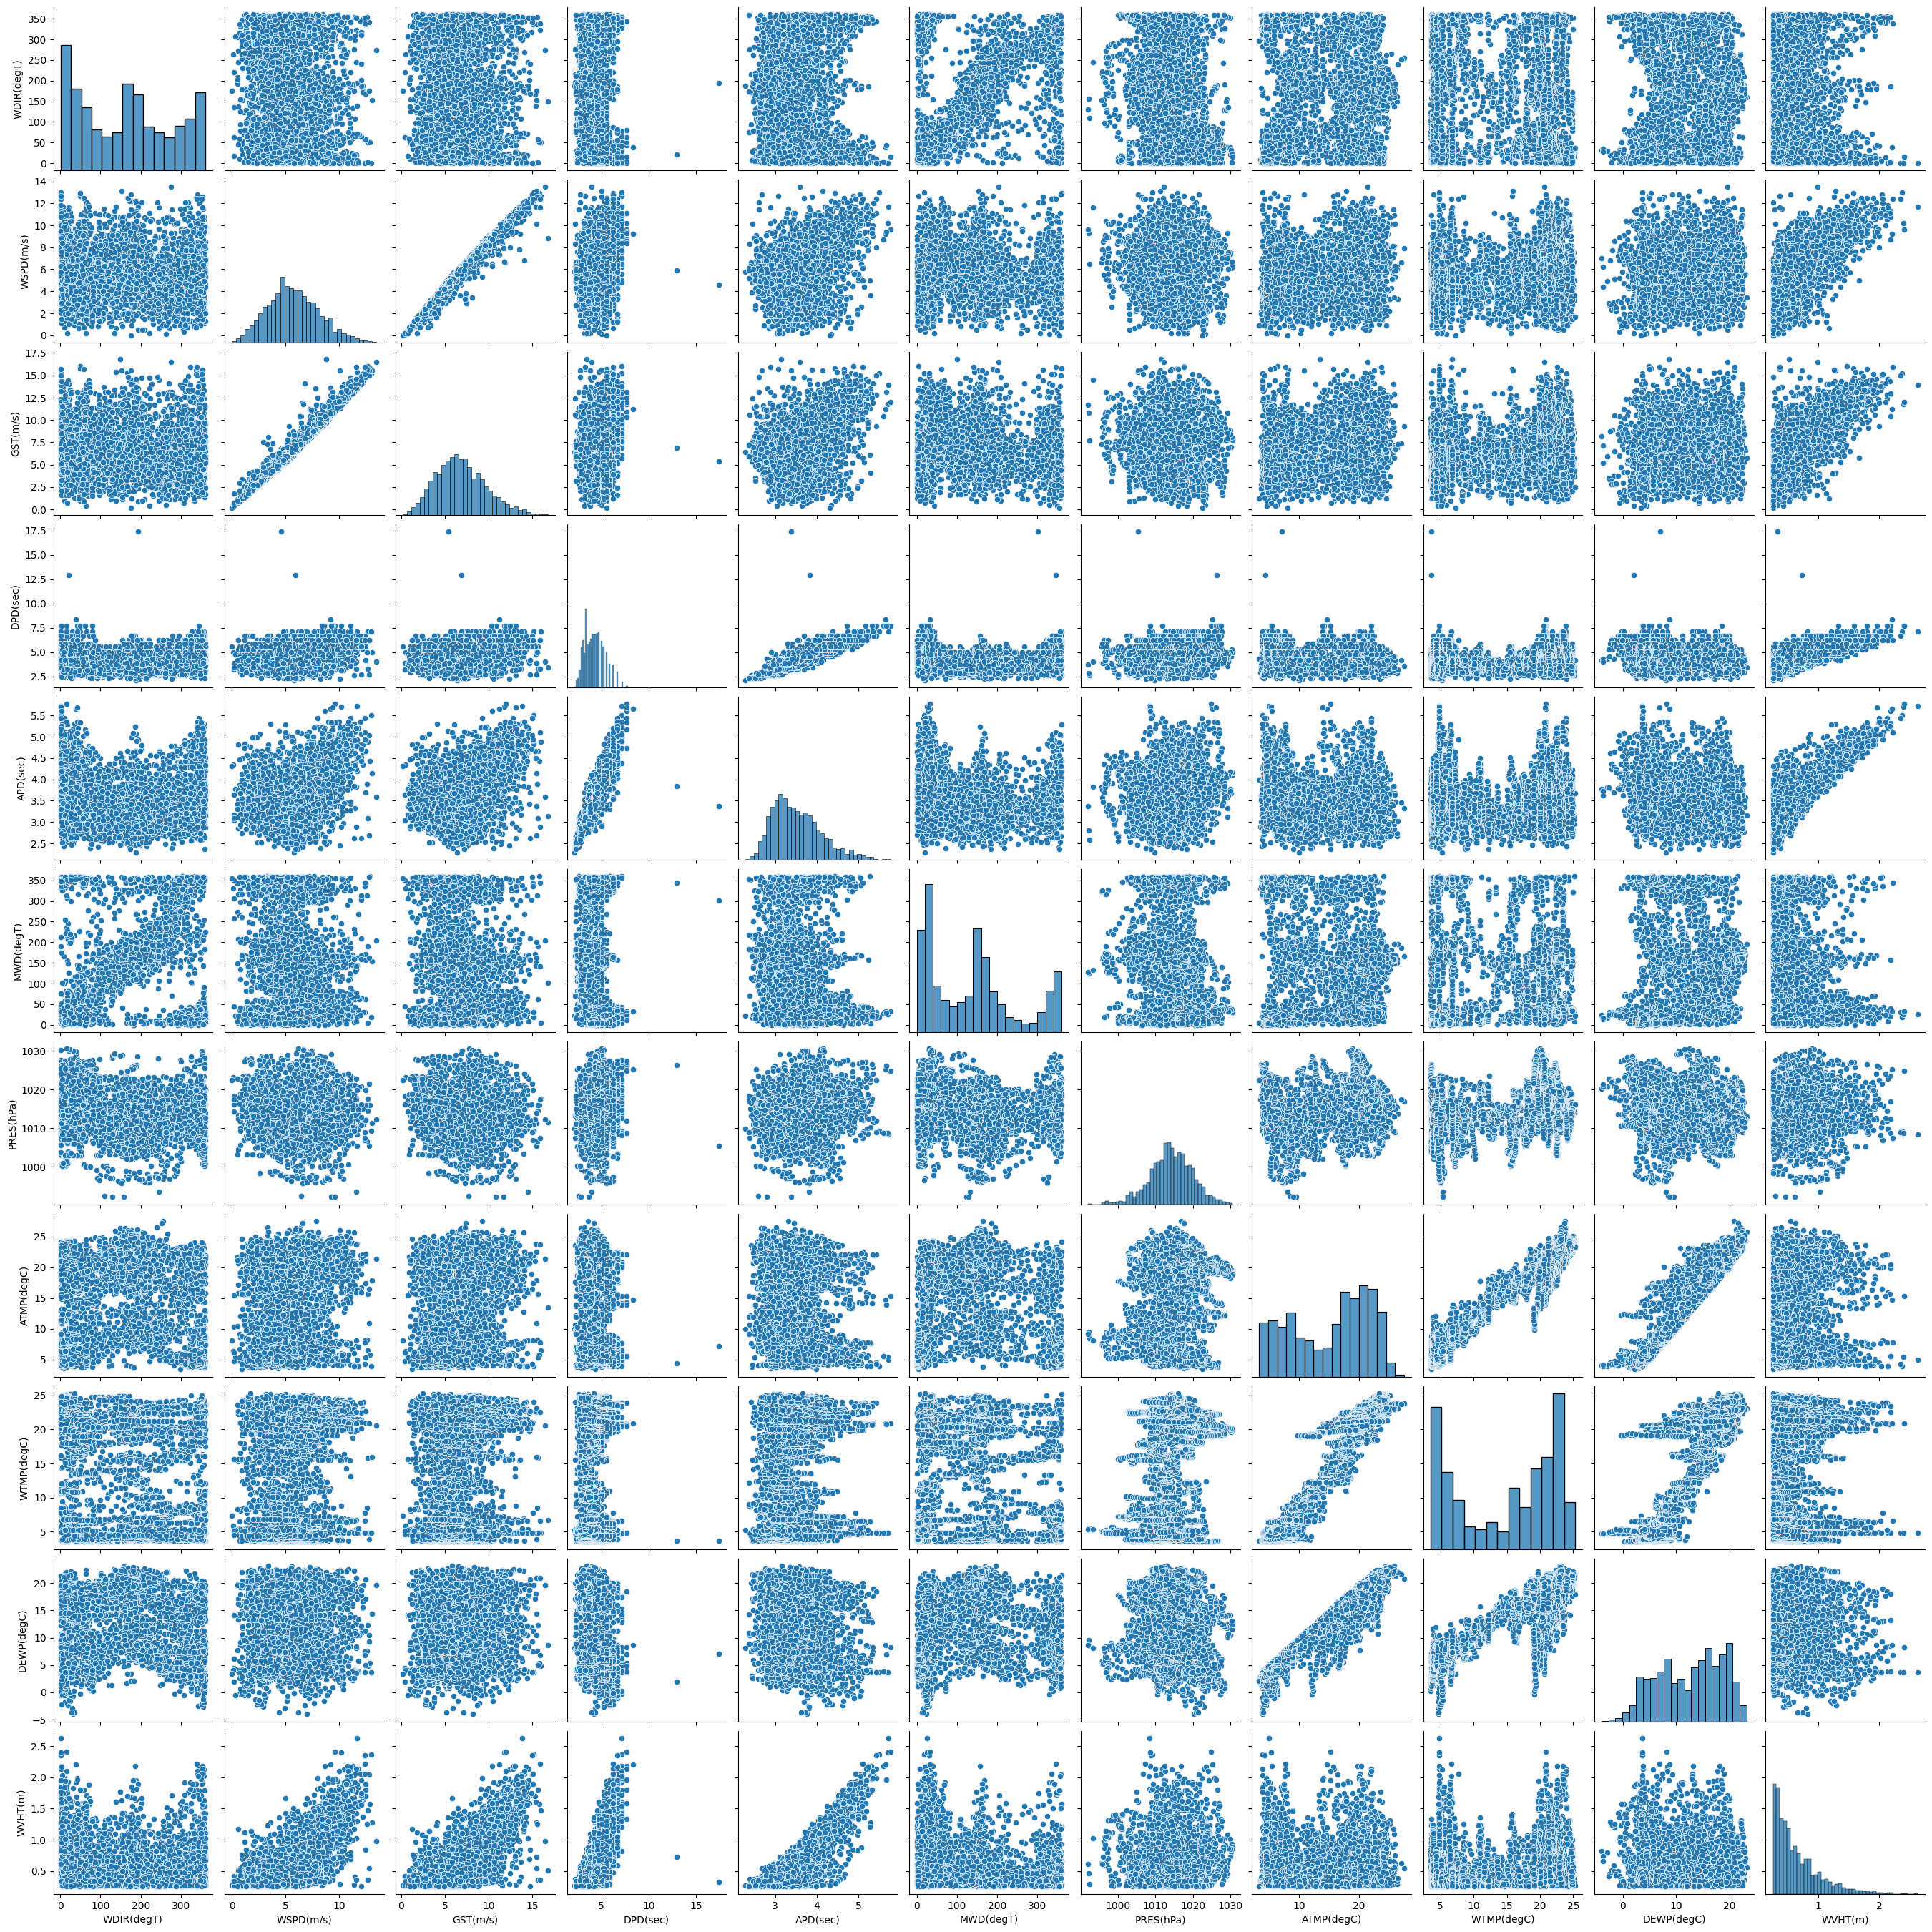

In [23]:
sns.pairplot(df[only])    #Plotting All types of 

# 4. ML Modelling

Note: I also tried ARIMA model but due to gap in training data( gaps in month wise as seen in graph) it was not performing good, Also Deep learning models like LSTMS didnt perform well due to very less size of training data and so it was performing worse than traditional ML models.

In [ ]:
!pip install catboost

In [26]:
# Importing all Necessary models and metrics

from sklearn.model_selection import TimeSeriesSplit
import xgboost as xgb
import catboost as cb
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor,VotingRegressor,StackingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

In [27]:
models = [                        #Forming List to cross Validate all regression models at once
        LinearRegression(),
        Ridge(),
        #Lasso(),
        #ElasticNet(),
        DecisionTreeRegressor(),
        RandomForestRegressor(),
        #KNeighborsRegressor(),          #these 5 gave worst rmse=0.3
        #SVR(),
        #MLPRegressor(),
        XGBRegressor(),
        AdaBoostRegressor(), 
        GradientBoostingRegressor(), 

        ExtraTreesRegressor(),
              
        LGBMRegressor(),
              
        CatBoostRegressor(loss_function='RMSE',verbose=0)
    ]
    
def PLOT(cv_results):           #Function to plot cross validation result of all regression model at once in bar chart
    cv_means = []
    cv_std = []
    for cv_result in cv_results:
        cv_means.append(np.mean(np.sqrt(cv_result[:])))  #take mean of only last 3 splits of each model
        cv_std.append(np.std(np.sqrt(cv_result[:])))     #take std of only last 3 splits  of each model

    cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,
                          "Algorithm":['Liner Reg','Ridge','DT','RF','XGB','AdaBoost',
                                       'GradBoost','ExtraTrees','LGBM','CatBoost']})
    plt.figure(figsize = (6,4))
    g = sns.barplot(x="CrossValMeans",y="Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
    g.set_xlabel("RMSE")
    g.set_title("Cross validation RMSE scores")
    total = len(cv_res)
    for p in g.patches:
        val = '{:.4f}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        g.annotate(val, (x, y))   

def kfold_func(x,y,CV=5,transform='default'):   #kfold Time series cross validation for multiple models at once
    n_splits = CV
    tscv = TimeSeriesSplit(n_splits=n_splits)   # Initialize TimeSeriesSplit
    scores=[]
    i=1
    for train_index, test_index in tscv.split(x):     # Loop through splits
        print(f'Split={i} , Train length={len(train_index)} Test Length={len(test_index)}')
        xtrain, xtest = x[train_index], x[test_index]
        ytrain, ytest=y[train_index],y[test_index]
        temp=[]
        for model in tqdm(models[:]):
            model.fit(xtrain,ytrain)
            ypred = model.predict(xtest)
            if transform=='default':
                score = mean_squared_error(ypred, ytest)
            elif transform=='log':
                score = mean_squared_error(np.exp(ypred), np.exp(ytest))  
            elif transform=='sqrt':   
                score = mean_squared_error((ypred)**2,(ytest)**2)
            else:
                score = mean_squared_error(inv_boxcox(ypred,-1),inv_boxcox(ytest,-1))        
            temp.append(score)
        scores.append(temp)   
        i+=1
    scores=list(np.array(scores).T)    
    return scores

def cross_val_score_ts(model,x,y,cv=5,transform='default'):  #Time series cross validation function
    n_splits = cv
    tscv = TimeSeriesSplit(n_splits=n_splits)   # Initialize TimeSeriesSplit
    temp=[]
    i=1
    for train_index, test_index in tscv.split(x):     # Loop through splits
        #print(f'Split={i} , Train length={len(train_index)} Test Length={len(test_index)}')
        xtrain, xtest = x[train_index], x[test_index]
        ytrain, ytest=y[train_index],y[test_index]

        model.fit(xtrain,ytrain)
        ypred = model.predict(xtest)
        if transform=='default':
            score = mean_squared_error(ypred, ytest)
        elif transform=='log':
            score = mean_squared_error(np.exp(ypred), np.exp(ytest))  
        elif transform=='sqrt':   
            score = mean_squared_error((ypred)**2,(ytest)**2)
        else:
            score = mean_squared_error(inv_boxcox(ypred,-1),inv_boxcox(ytest,-1))  
        temp.append(score)
        i+=1 
    return np.array(temp)

## Compare Models

In [30]:
cv_results=kfold_func(x,y,5)            #containes mse for each model, K fold Time series split

Split=1 , Train length=651 Test Length=646


100%|██████████| 10/10 [00:14<00:00,  1.41s/it]


Split=2 , Train length=1297 Test Length=646


100%|██████████| 10/10 [00:15<00:00,  1.52s/it]


Split=3 , Train length=1943 Test Length=646


100%|██████████| 10/10 [00:14<00:00,  1.44s/it]


Split=4 , Train length=2589 Test Length=646


100%|██████████| 10/10 [00:15<00:00,  1.59s/it]


Split=5 , Train length=3235 Test Length=646


100%|██████████| 10/10 [00:12<00:00,  1.26s/it]


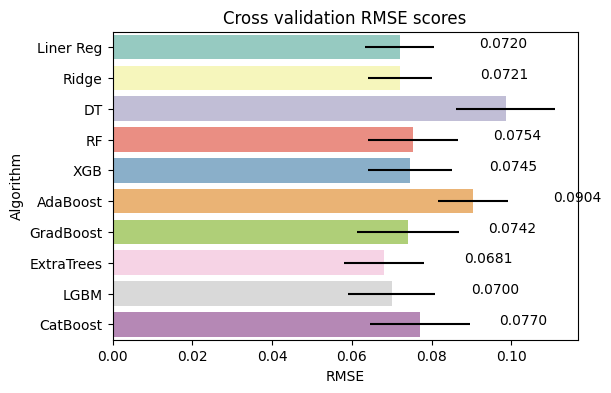

In [31]:
PLOT(cv_results)     # 5 lag features  without rolling features and with all original data features and date time features ------------BEST DATA TILL NOW FOR best Kaggle result on Public board

## CONCLUSION: Top 4 best models---
1. ExtraTrees
2. LightGBM
3. Linear Regression
4. Ridge Regression

### Training Test Split

In [32]:
xtrain,xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=123,shuffle=False)  #shuffle should be false as it is a Time series data
print(f"x shape = {x.shape} , y shape = {y.shape}")
print(f"xtrain shape = {xtrain.shape} , ytrain shape = {ytrain.shape}")
print(f"xtest shape = {xtest.shape} , ytest shape = {ytest.shape}")

x shape = (3881, 20) , y shape = (3881,)
xtrain shape = (3104, 20) , ytrain shape = (3104,)
xtest shape = (777, 20) , ytest shape = (777,)


### 1. Compare Voting Ensemble Models
* Also Tried Stacking Ensemble technique but Voting performs better

In [36]:
# Defining All major models

r1=CatBoostRegressor(loss_function='RMSE',verbose=0)
r2=LGBMRegressor()
#r2=LGBMRegressor(**{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_samples': 20,
#               'n_estimators': 300, 'num_leaves': 31, 'reg_alpha': 0, 'reg_lambda': 0, 'subsample': 0.8})  # Hyper parameter Tunded
r3=ExtraTreesRegressor()
#r3=ExtraTreesRegressor(**{'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150})
r4=GradientBoostingRegressor()
r5=XGBRegressor()
r6=RandomForestRegressor()
r7=LinearRegression()
r8= Ridge()

"""
All Commented MODELS are Hyperparameter Tuned models of above models but didnt perform well on Kaggle test set data
"""

#r6=RandomForestRegressor(bootstrap=True, max_depth=9, max_features=0.8377008256605148, min_samples_leaf=2, min_samples_split=9, n_estimators=499),
              #these 5 gave worst rmse=0.3

#r5=XGBRegressor(colsample_bytree=1.0,gamma=1e-09, learning_rate=0.028968834282299193, max_depth=10, min_child_weight=3.889391770851712,
#                     n_estimators=138, reg_alpha=0.0009402119708756112, reg_lambda=2.611022260264523e-08, subsample=0.2219810196104425)
#r3=ExtraTreesRegressor(bootstrap=False, max_depth=26, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000)
#r3=ExtraTreesRegressor(bootstrap=False, max_depth=47, max_features=None, min_samples_leaf=1, min_samples_split=13, n_estimators=901)
           
#r2=LGBMRegressor(colsample_bytree=1.0, learning_rate=0.055629268911040246, max_depth=10, min_child_samples=5,
#                      n_estimators=341, num_leaves=11,  reg_alpha=1e-09, reg_lambda=0.024142088612160016 ,  subsample=0.1)
#r2=LGBMRegressor(colsample_bytree=0.788253987145805, learning_rate=0.06400492748049907, max_depth=8, min_child_samples=7,
#                      n_estimators=133, num_leaves=41,  reg_alpha=1.020706429371349e-08, reg_lambda=1.5035896545851651e-06 ,  subsample=0.28132056074130923)


#r1=CatBoostRegressor(verbose=0,loss_function='RMSE',bagging_temperature=10.0, colsample_bylevel=1.0, depth=1, iterations=343,
#                          l2_leaf_reg=1e-09, learning_rate=0.08252508725505978, subsample=1.0) 

'\nAll Commented MODELS are Hyperparameter Tuned models of above models but didnt perform well on Kaggle test set data\n'

In [35]:
################################################################################
model = VotingRegressor([('Linear Reg', r7),('ridge',r8),('lgbm',r2),('et',r3)])     # BEST MODEL .............RMSE= 0.0805 with 5 lag features withiut rolling
scores1 = cross_val_score(model,x,y, cv=5, scoring='neg_mean_squared_error')    
scores2 = cross_val_score_ts(model,x,y, cv=5)                 
print(f'{model.__class__.__name__}: rmse = {np.mean(np.sqrt(np.abs(scores1))):.4f}  rmse_ts = {np.mean(np.sqrt(np.abs(scores2))):.4f}')

VotingRegressor: rmse = 0.0651  rmse_ts = 0.0652


### 1st RMSE= Normal cross_val_score rmse and 2nd RMSE = is Time series split varient of cross_val_score

### 2. Predict

In [37]:
model.fit(x,y)

VotingRegressor(estimators=[('Linear Reg', LinearRegression()),
                            ('ridge', Ridge()), ('lgbm', LGBMRegressor()),
                            ('et', ExtraTreesRegressor())])

In [40]:
def predict(model,df,df_test):
    result=[]
    target_variable='WVHT(m)'
    total_length=3886-5         # subtract with max lag/roll shift
    cols=['#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)',
       'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)',
       'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)', 'WVHT(m)']

    for i in tqdm(range(total_length,len(df)+len(df_test))):
        ind=i-total_length

        d={'lag_1':df['WVHT(m)'].iloc[i-1],'lag_2':df['WVHT(m)'].iloc[i-2],'lag_3':df['WVHT(m)'].iloc[i-3],'lag_4':df['WVHT(m)'].iloc[i-4]
           ,'lag_5':df['WVHT(m)'].iloc[i-5]}

        for col in cols[:-1]:
            d[col]=df_test[col].iloc[ind]  
        X=(np.array(list(d.values())).reshape(-1,df_predict.shape[1]-1))        #df_predict also contains target column so contains either 18+1=19 columns or 26+1=27
       
        wvht=model.predict(X)    
        result.append(wvht)
        d['WVHT(m)']=wvht
        df=df.append(d, ignore_index=True)

        #x=df.iloc[:,1:].values
        #y=df['WVHT(m)'].values
        #model.fit(x,y)

        i+=1
    return np.array(result)
    

In [41]:
df_predict=df
#df_predict['WVHT(m)']=np.log(df_predict['WVHT(m)'])       #............dont forget to transform the y variable here also, if using Transformation on Y variable
ypred=predict(model,df_predict,df_test)

100%|██████████| 1535/1535 [00:34<00:00, 44.39it/s]


In [42]:
ypred

array([[0.28778982],
       [0.26674641],
       [0.25902318],
       ...,
       [0.46460133],
       [0.70508898],
       [0.95356738]])

In [44]:
def form_csv(df_test,y_pred):                  #Create Submit.csv file
    s=pd.Series(y_pred,name='WVHT(m)')
    dff=pd.concat([df_test['ID'],s],axis=1).set_index('ID')
    dff.to_csv('submit.csv')  
form_csv(df_test,ypred.reshape(-1))      

## Plotting Prediction for our Ensemble model

In [49]:
final_model=VotingRegressor([('Linear Reg', r7),('ridge',r8),('lgbm',r2),('et',r3)])  
final_model.fit(xtrain,ytrain)
ypred_=final_model.predict(xtest)

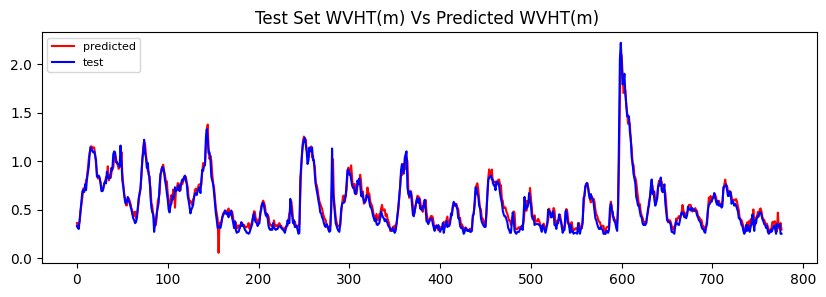

In [52]:
plt.figure(figsize=(10,3), dpi=100)
plt.plot(ypred_, label='predicted',color='r')
plt.plot(ytest, label='test', color='b')
plt.title('Test Set WVHT(m) Vs Predicted WVHT(m) ')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# x-axis is date time axis, but date time is not provided as there are some gaps in between dates, so graph doesnt look good 
# x-axis ~ 800 = Test set size of 800+ data points

## Hyper Parameter Tuning

### 1. Using GridsearchCV

In [ ]:
model = GradientBoostingRegressor()

# Define the hyperparameter grid
param_grid = {'learning_rate': [0.02, 0.01,0.005],
              'n_estimators': [80,100,150,200],
              'max_depth': [3, 4, 5],
              'max_features' : list(range(6,x.shape[1]))}


# Define the GridSearchCV object
gs = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)

gs.fit(x,y)
# Print the best hyperparameters
print(gs.best_params_)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
{'learning_rate': 0.02, 'max_depth': 5, 'max_features': 9, 'n_estimators': 200}


In [ ]:
model2 = LGBMRegressor()
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'num_leaves': [31, 63, 127],
    'min_child_samples': [20, 30, 50],
    'reg_alpha': [0, 1e-1, 1, 2],
    'reg_lambda': [0, 1e-1, 1, 5, 10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

lgbm = LGBMRegressor()
gs2 = GridSearchCV(lgbm, param_grid=param_grid, cv=5, n_jobs=-1)
gs2.fit(x,y)
print(gs2.best_params_)

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor()
gs3 = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1)
gs3.fit(x, y)
print(gs3.best_params_)

{'bootstrap': True, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Create the ExtraTreesRegressor object
et = ExtraTreesRegressor()

# Create the GridSearchCV object
gs4 = GridSearchCV(et, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
gs4.fit(x, y)
print(gs4.best_params_)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 6, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1],
}

xgb = XGBRegressor()

# Create the GridSearchCV object
gs5 = GridSearchCV(xgb, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
gs5.fit(x, y)
print(gs5.best_params_)

### 2. Using BayesearchCV

In [ ]:
!pip install scikit-optimize

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

In [ ]:
search_space = {
    'learning_rate': Real(0.01, 1.0, prior='log-uniform'),
    'n_estimators': Integer(50, 200),
    'max_depth': Integer(1, 10),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 10),
    'max_features': Categorical(['sqrt', 'log2', None])
}
model = GradientBoostingRegressor()

bayes_cv = BayesSearchCV(model,search_space,n_iter=50,scoring='neg_mean_squared_error',cv=5)
bayes_cv.fit(x, y)
print("Best Score: ", bayes_cv.best_score_)
print("Best Parameters: ", bayes_cv.best_params_)

Best Score:  -0.0046520513952607225
Best Parameters:  OrderedDict([('learning_rate', 0.22231509235692853), ('max_depth', 3), ('max_features', None), ('min_samples_leaf', 9), ('min_samples_split', 9), ('n_estimators', 119)])


In [ ]:
search_space = {
    'n_estimators': Integer(100, 1000),
    'max_depth': Integer(1, 50),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 20),
    'max_features': Categorical(['sqrt', 'log2', None]),
    'bootstrap': Categorical([True, False])
}
et_model = ExtraTreesRegressor()

bayes_cv1 = BayesSearchCV(et_model,search_space,n_iter=50,scoring='neg_mean_squared_error',cv=5)
bayes_cv1.fit(x, y)
print("Best Score: ", bayes_cv1.best_score_)
print("Best Parameters: ", bayes_cv1.best_params_)

Best Score:  -0.004398404994233054
Best Parameters:  OrderedDict([('bootstrap', False), ('max_depth', 26), ('max_features', None), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 1000)])


In [ ]:
search_space = {
    'learning_rate': Real(0.01, 1.0, prior='log-uniform'),
    'n_estimators': Integer(50, 500),
    'max_depth': Integer(1, 10),
    'min_child_weight': Real(1, 10),
    'subsample': Real(0.1, 1.0, prior='log-uniform'),
    'colsample_bytree': Real(0.1, 1.0, prior='log-uniform'),
    'reg_alpha': Real(1e-9, 100, prior='log-uniform'),
    'reg_lambda': Real(1e-9, 100, prior='log-uniform'),
    'gamma': Real(1e-9, 100, prior='log-uniform')
}

xgb_model = XGBRegressor()

bayes_cv2 = BayesSearchCV(xgb_model, search_space, n_iter=50, scoring='neg_mean_squared_error',cv=5)
bayes_cv2.fit(x, y)
print("Best Score: ", bayes_cv2.best_score_)
print("Best Parameters: ", bayes_cv2.best_params_)

In [ ]:
search_space = {
    'learning_rate': Real(0.01, 1.0, prior='log-uniform'),
    'iterations': Integer(50, 500),
    'depth': Integer(1, 10),
    'l2_leaf_reg': Real(1e-9, 100, prior='log-uniform'),
    'subsample': Real(0.1, 1.0, prior='log-uniform'),
    'colsample_bylevel': Real(0.1, 1.0, prior='log-uniform'),
    'bagging_temperature': Real(0.0, 10.0),
}

cat_model = CatBoostRegressor(loss_function='RMSE',verbose=0)
bayes_cv3 = BayesSearchCV(cat_model, search_space, n_iter=50, scoring='neg_mean_squared_error', cv=5)
bayes_cv3.fit(x, y)
print("Best Score: ", bayes_cv3.best_score_)
print("Best Parameters: ", bayes_cv3.best_params_)

In [ ]:
search_space = {
    'learning_rate': Real(0.01, 1.0, prior='log-uniform'),
    'n_estimators': Integer(50, 500),
    'max_depth': Integer(1, 10),
    'num_leaves': Integer(2, 50),
    'subsample': Real(0.1, 1.0, prior='log-uniform'),
    'colsample_bytree': Real(0.1, 1.0, prior='log-uniform'),
    'reg_alpha': Real(1e-9, 100, prior='log-uniform'),
    'reg_lambda': Real(1e-9, 100, prior='log-uniform'),
    'min_child_samples': Integer(5, 50)
}

# Create the LightGBM model
lgb_model = LGBMRegressor()
bayes_cv4 = BayesSearchCV(lgb_model, search_space, n_iter=50, scoring='neg_mean_squared_error', cv=5)
bayes_cv4.fit(x, y)
print("Best Score: ", bayes_cv4.best_score_)
print("Best Parameters: ", bayes_cv4.best_params_)

In [ ]:
search_space = {
    'n_estimators': Integer(50, 500),
    'max_depth': Integer(1, 10),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 10),
    'max_features': Real(0.1, 1.0, prior='log-uniform'),
    'bootstrap': [True, False]
}
rf_model = RandomForestRegressor()
bayes_cv5 = BayesSearchCV(rf_model, search_space, n_iter=50, scoring='neg_mean_squared_error', cv=5)
bayes_cv5.fit(x, y)
print("Best Score: ", bayes_cv5.best_score_)
print("Best Parameters: ", bayes_cv5.best_params_)

Best Score:  -0.0047064198797236514
Best Parameters:  OrderedDict([('bootstrap', True), ('max_depth', 9), ('max_features', 0.8377008256605148), ('min_samples_leaf', 2), ('min_samples_split', 9), ('n_estimators', 499)])


In [ ]:
search_space = {
    'n_estimators': Integer(50, 500),
    'learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'loss': ['linear', 'square', 'exponential']
}
ada_model = AdaBoostRegressor()
bayes_cv6 = BayesSearchCV(ada_model, search_space, n_iter=50, scoring='neg_mean_squared_error', cv=5)
bayes_cv6.fit(x, y)
print("Best Score: ", bayes_cv6.best_score_)
print("Best Parameters: ", bayes_cv6.best_params_)

## Hyper Parameter Tuned Modelling

In [ ]:
def kfold_func_grid(x,y,CV=5,transform='default'):
    models = [
        LinearRegression(),
        Ridge(),
        #Lasso(),
        #ElasticNet(),
        DecisionTreeRegressor(),
        RandomForestRegressor(**{'bootstrap': True, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}),
        #KNeighborsRegressor(),          #these 5 gave worst rmse=0.3
        #SVR(),
        #MLPRegressor(),
        XGBRegressor(**{'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 0, 'subsample': 0.8}),
        AdaBoostRegressor(), 
        GradientBoostingRegressor(**{'learning_rate': 0.02, 'max_depth': 5, 'max_features': 9, 'n_estimators': 200}), 

        ExtraTreesRegressor(**{'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}),
        #{'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}  
              
        LGBMRegressor(**{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_samples': 20,
               'n_estimators': 300, 'num_leaves': 31, 'reg_alpha': 0, 'reg_lambda': 0, 'subsample': 0.8}),
             
        CatBoostRegressor(**{'loss_function':'RMSE','verbose':0,'depth': 4, 'iterations': 500, 'l2_leaf_reg': 1, 'learning_rate': 0.1}) 
    ]

    n_splits = CV
    tscv = TimeSeriesSplit(n_splits=n_splits)   # Initialize TimeSeriesSplit
    scores=[]
    i=1
    for train_index, test_index in tscv.split(x):     # Loop through splits
        print(f'Split={i} , Train length={len(train_index)} Test Length={len(test_index)}')
        xtrain, xtest = x[train_index], x[test_index]
        ytrain, ytest=y[train_index],y[test_index]
        temp=[]
        for model in tqdm(models[:]):
            model.fit(xtrain,ytrain)
            ypred = model.predict(xtest)
            if transform=='default':
                score = mean_squared_error(ypred, ytest)
            elif transform=='log':
                score = mean_squared_error(np.exp(ypred), np.exp(ytest))  
            elif transform=='sqrt':   
                score = mean_squared_error((ypred)**2,(ytest)**2)
            else:
                score = mean_squared_error(inv_boxcox(ypred,-1),inv_boxcox(ytest,-1))        
            temp.append(score) 
        scores.append(temp)   
        i+=1
    scores=list(np.array(scores).T)    
    return scores

def kfold_func_bayes(x,y,CV=5,transform='default'):
    models = [
        LinearRegression(),
        Ridge(),
        #Lasso(),
        #ElasticNet(),
        DecisionTreeRegressor(),
        RandomForestRegressor(bootstrap=True, max_depth=9, max_features=0.8377008256605148, min_samples_leaf=2, min_samples_split=9, n_estimators=499),
        #KNeighborsRegressor(),          #these 5 gave worst rmse=0.3
        #SVR(),
        #MLPRegressor(),
        XGBRegressor(colsample_bytree=1.0,gamma=1e-09, learning_rate=0.028968834282299193, max_depth=10, min_child_weight=3.889391770851712, 
                     n_estimators=138, reg_alpha=0.0009402119708756112, reg_lambda=2.611022260264523e-08, subsample=0.2219810196104425),
        AdaBoostRegressor(learning_rate=0.06973419416032468, loss='exponential', n_estimators=386), 
        GradientBoostingRegressor(learning_rate=0.22231509235692853,max_depth=3,max_features= None, min_samples_leaf=9, min_samples_split=9, n_estimators=119), 

        ExtraTreesRegressor(bootstrap=False, max_depth=26, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000),
        #{'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}  
              
        LGBMRegressor(colsample_bytree=1.0, learning_rate=0.055629268911040246, max_depth=10, min_child_samples=5,
                      n_estimators=341, num_leaves=11,  reg_alpha=1e-09, reg_lambda=0.024142088612160016 ,  subsample=0.1),
             
        CatBoostRegressor(verbose=0,loss_function='RMSE',bagging_temperature=10.0, colsample_bylevel=1.0, depth=1, iterations=343,
                          l2_leaf_reg=1e-09, learning_rate=0.08252508725505978, subsample=1.0) 
    ]

    n_splits = CV
    tscv = TimeSeriesSplit(n_splits=n_splits)   # Initialize TimeSeriesSplit
    scores=[]
    i=1
    for train_index, test_index in tscv.split(x):     # Loop through splits
        print(f'Split={i} , Train length={len(train_index)} Test Length={len(test_index)}')
        xtrain, xtest = x[train_index], x[test_index]
        ytrain, ytest=y[train_index],y[test_index]
        temp=[]
        for model in tqdm(models[:]):
            model.fit(xtrain,ytrain)
            ypred = model.predict(xtest)
            if transform=='default':
                score = mean_squared_error(ypred, ytest)
            elif transform=='log':
                score = mean_squared_error(np.exp(ypred), np.exp(ytest))  
            elif transform=='sqrt':   
                score = mean_squared_error((ypred)**2,(ytest)**2)
            else:
                score = mean_squared_error(inv_boxcox(ypred,-1),inv_boxcox(ytest,-1))        
            temp.append(score) 
        scores.append(temp)   
        i+=1
    scores=list(np.array(scores).T)    
    return scores    

In [ ]:
cv_results=kfold_func_grid(x,y,CV=5)   

Split=1 , Train length=651 Test Length=646


100%|██████████| 10/10 [00:03<00:00,  3.07it/s]


Split=2 , Train length=1297 Test Length=646


100%|██████████| 10/10 [00:05<00:00,  1.86it/s]


Split=3 , Train length=1943 Test Length=646


100%|██████████| 10/10 [00:08<00:00,  1.15it/s]


Split=4 , Train length=2589 Test Length=646


100%|██████████| 10/10 [00:11<00:00,  1.11s/it]


Split=5 , Train length=3235 Test Length=646


100%|██████████| 10/10 [00:16<00:00,  1.63s/it]


In [ ]:
cv_results2=kfold_func_bayes(x,y,CV=5)   

Split=1 , Train length=651 Test Length=646


100%|██████████| 10/10 [00:24<00:00,  2.42s/it]


Split=2 , Train length=1297 Test Length=646


100%|██████████| 10/10 [00:25<00:00,  2.55s/it]


Split=3 , Train length=1943 Test Length=646


100%|██████████| 10/10 [00:27<00:00,  2.76s/it]


Split=4 , Train length=2589 Test Length=646


100%|██████████| 10/10 [00:30<00:00,  3.07s/it]


Split=5 , Train length=3235 Test Length=646


100%|██████████| 10/10 [00:37<00:00,  3.71s/it]


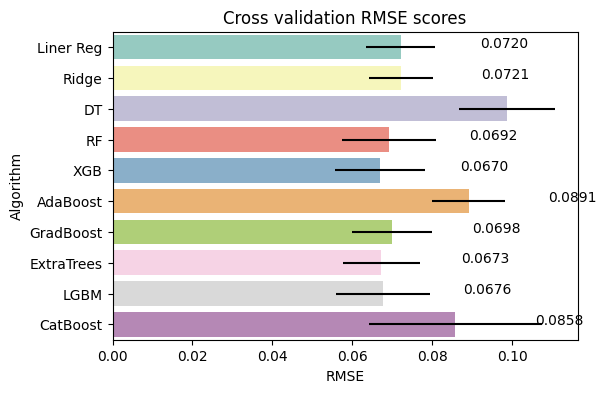

In [ ]:
PLOT(cv_results2)     #bayes search cv

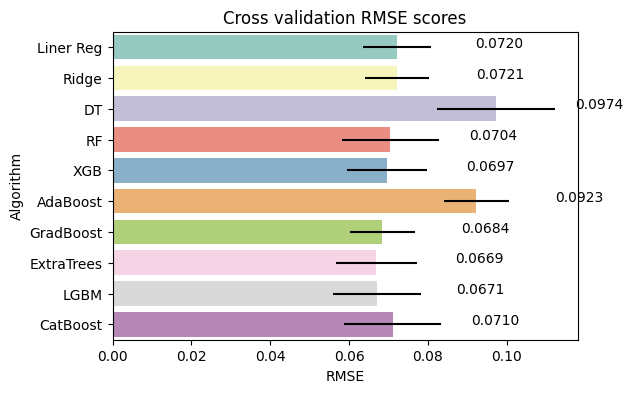

In [ ]:
PLOT(cv_results)  #grid search cv

In [ ]:
r1=ExtraTreesRegressor(**{'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150})
r2=GradientBoostingRegressor(learning_rate=0.22231509235692853,max_depth=3,max_features= None, min_samples_leaf=9, min_samples_split=9, n_estimators=119)
r3=XGBRegressor(colsample_bytree=1.0,gamma=1e-09, learning_rate=0.028968834282299193, max_depth=10, min_child_weight=3.889391770851712, 
                     n_estimators=138, reg_alpha=0.0009402119708756112, reg_lambda=2.611022260264523e-08, subsample=0.2219810196104425)

r4=LGBMRegressor(colsample_bytree=1.0, learning_rate=0.055629268911040246, max_depth=10, min_child_samples=5,
                      n_estimators=341, num_leaves=11,  reg_alpha=1e-09, reg_lambda=0.024142088612160016 ,  subsample=0.1)

r5=RandomForestRegressor(bootstrap=True, max_depth=9, max_features=0.8377008256605148, min_samples_leaf=2, min_samples_split=9, n_estimators=499)

r6=CatBoostRegressor(verbose=0,loss_function='RMSE',bagging_temperature=10.0, colsample_bylevel=1.0, depth=1, iterations=343,
                          l2_leaf_reg=1e-09, learning_rate=0.08252508725505978, subsample=1.0) 

r7=LinearRegression()
r8=Ridge()

### 1. Comparing Voting

In [ ]:
model = VotingRegressor([('ET', r1),('gbm',r2)])                                             #.............0.09139
scores1 = cross_val_score(model,x,y, cv=5, scoring='neg_mean_squared_error')    
scores2 = cross_val_score_ts(model,x,y, cv=5)                 
print(f'{model.__class__.__name__}: rmse = {np.mean(np.sqrt(np.abs(scores1))):.4f}  rmse_ts = {np.mean(np.sqrt(np.abs(scores2))):.4f}')

VotingRegressor: rmse = 0.0649  rmse_ts = 0.0659


In [ ]:
model2 = VotingRegressor([('ET', r1),('gbm',r2),('xgb',r3),('linear',r7)])                  #............0.08657 ..........worked BEST compared to others in this set
scores1 = cross_val_score(model2,x,y, cv=5, scoring='neg_mean_squared_error')    
scores2 = cross_val_score_ts(model2,x,y, cv=5)                 
print(f'{model2.__class__.__name__}: rmse = {np.mean(np.sqrt(np.abs(scores1))):.4f}  rmse_ts = {np.mean(np.sqrt(np.abs(scores2))):.4f}')

VotingRegressor: rmse = 0.0637  rmse_ts = 0.0642


In [ ]:
model = VotingRegressor([('lgbm', r3),('gbm',r2)])     
scores1 = cross_val_score(model,x,y, cv=5, scoring='neg_mean_squared_error')    
scores2 = cross_val_score_ts(model,x,y, cv=5)                 
print(f'{model.__class__.__name__}: rmse = {np.mean(np.sqrt(np.abs(scores1))):.4f}  rmse_ts = {np.mean(np.sqrt(np.abs(scores2))):.4f}')

VotingRegressor: rmse = 0.0654  rmse_ts = 0.0665


In [ ]:
model2 = VotingRegressor([('ET', r1),('gbm',r2),('xgb',r3)])                      #.........0.09322
scores1 = cross_val_score(model2,x,y, cv=5, scoring='neg_mean_squared_error')    
scores2 = cross_val_score_ts(model2,x,y, cv=5)                 
print(f'{model2.__class__.__name__}: rmse = {np.mean(np.sqrt(np.abs(scores1))):.4f}  rmse_ts = {np.mean(np.sqrt(np.abs(scores2))):.4f}')

VotingRegressor: rmse = 0.0646  rmse_ts = 0.0654


In [ ]:
model = VotingRegressor([('ET', r1),('gbm',r2),('xgb',r3),('lgbm',r4)])          #............. 0.09375
scores1 = cross_val_score(model,x,y, cv=5, scoring='neg_mean_squared_error')    
scores2 = cross_val_score_ts(model,x,y, cv=5)                 
print(f'{model.__class__.__name__}: rmse = {np.mean(np.sqrt(np.abs(scores1))):.4f}  rmse_ts = {np.mean(np.sqrt(np.abs(scores2))):.4f}')

VotingRegressor: rmse = 0.0645  rmse_ts = 0.0653


In [ ]:
model = VotingRegressor([('ET', r1),('gbm',r2),('xgb',r3),('lgbm',r4),('rf',r5)])     
scores1 = cross_val_score(model,x,y, cv=5, scoring='neg_mean_squared_error')    
scores2 = cross_val_score_ts(model,x,y, cv=5)                 
print(f'{model.__class__.__name__}: rmse = {np.mean(np.sqrt(np.abs(scores1))):.4f}  rmse_ts = {np.mean(np.sqrt(np.abs(scores2))):.4f}')

VotingRegressor: rmse = 0.0648  rmse_ts = 0.0656


In [ ]:
model = VotingRegressor([('ET', r1),('gbm',r2),('xgb',r3),('rf',r5)])     
scores1 = cross_val_score(model,x,y, cv=5, scoring='neg_mean_squared_error')    
scores2 = cross_val_score_ts(model,x,y, cv=5)                 
print(f'{model.__class__.__name__}: rmse = {np.mean(np.sqrt(np.abs(scores1))):.4f}  rmse_ts = {np.mean(np.sqrt(np.abs(scores2))):.4f}')

VotingRegressor: rmse = 0.0650  rmse_ts = 0.0660


In [ ]:
model2.fit(x,y)

VotingRegressor(estimators=[('ET',
                             ExtraTreesRegressor(max_depth=40,
                                                 max_features='auto',
                                                 min_samples_leaf=2,
                                                 min_samples_split=5,
                                                 n_estimators=150)),
                            ('gbm',
                             GradientBoostingRegressor(learning_rate=0.22231509235692853,
                                                       min_samples_leaf=9,
                                                       min_samples_split=9,
                                                       n_estimators=119)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_byleve...
                                          interaction_constraints=None,
                                          learning_rate=0.028968834282299193,
                                          max_bin=None, max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=10,
                                          max_leaves=None,
                                          min_child_weight=3.889391770851712,
                                          missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=138, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...)),
                            ('linear', LinearRegression())])

### 2. Comparing Stacking

In [ ]:
estimators = [('linear',r7),('ridge',r8),('lgbm',r2),('et',r1)]          

stk= StackingRegressor(estimators=estimators, final_estimator=r6)
scores1 = cross_val_score(model,x,y, cv=5, scoring='neg_mean_squared_error')    
scores2 = cross_val_score_ts(model,x,y, cv=5)                 
print(f'{stk.__class__.__name__}: rmse = {np.mean(np.sqrt(np.abs(scores1))):.4f}  rmse_ts = {np.mean(np.sqrt(np.abs(scores2))):.4f}')